In [5]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

## Сгенерировать данные (датасет) случайным образом:

```text
date_in     | customer_count | country_code | status
----------------------------------------------------
2024-01-01  | 901            | RU           | 1
2024-01-02  | 901            | US           | 2
2024-01-03  | 901            | KZ           | 1
2024-01-04  | 901            | IT           | 3
2024-01-05  | 901            | RU           | 1
2024-01-06  | 901            | RU           | 3
2024-01-01  | 901            | US           | 1
2024-01-02  | 1024           | US           | 2
2024-01-03  | 901            | KZ           | 1
2024-01-04  | 901            | IT           | 3
2024-01-05  | 901            | RU           | 1
2024-01-06  | 901            | RU           | 3
```

для примера будем создавать датасет для диапазона 2024-01-01-2024-02-28 x 4

In [ ]:
from numpy import random  # my
import time

def create_dataset(number_for_date=1):
    result = []
    # ...
    countries = ['RU','US','KZ','IT','RU']
    statuses = [1,2,3]
    str_time_prop('2024-01-01', '2024-02-28',)
    return result

In [12]:
from numpy import random  # my
import time

def create_dataset(number_for_date=1):
    result = []
    # ...
    country_codes = ['RU','US','KZ','IT','RU','Ru','Us','Kz','It','ru','us','kz','it']
    status = [1,2,3]
    for i in range(number_for_date):
        dates_rng = pd.date_range(start='2023-01-01', end='2024-04-05', freq='D')
        rand_cutomer_count = random.randint(low=0, high=1200, size=len(dates_rng))
        rand_status = [status[random.randint(0,len(status))] for i in range(len(dates_rng))]
        rand_country_code = [country_codes[random.randint(0,len(country_codes))] for i in range(len(dates_rng))]
        result.extend(zip(dates_rng, rand_cutomer_count, rand_country_code, rand_status))
    return result

In [ ]:
pd.read_excel? to_excel
pd.read_json?  to_json
pd.read_xml?   to_xml


In [14]:
dataset = create_dataset(4)
df = pd.DataFrame(data=dataset, columns=['date_in', 'customer_count', 'country_code', 'status'])
df.head(10)

,date_in,customer_count,country_code,status
0,2023-01-01,379,Us,3
1,2023-01-02,914,US,3
2,2023-01-03,553,ru,3
3,2023-01-04,806,kz,1
4,2023-01-05,669,RU,3
5,2023-01-06,1110,Ru,1
6,2023-01-07,543,Us,3
7,2023-01-08,16,IT,2
8,2023-01-09,1154,It,1
9,2023-01-10,43,it,3


In [18]:
df.to_excel('company_stats.xlsx', index=False)
df = pd.read_excel('company_stats.xlsx',0, index_col='date_in')

In [ ]:
df.shape,df.index, df.dtypes

In [19]:
df.shape


(1844, 3)

In [20]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05'],
              dtype='datetime64[ns]', name='date_in', length=1844, freq=None)

In [21]:
df.dtypes

customer_count     int64
country_code      object
status             int64
dtype: object

In [22]:
df.head()

,customer_count,country_code,status
date_in,,,
2023-01-01,379,Us,3
2023-01-02,914,US,3
2023-01-03,553,ru,3
2023-01-04,806,kz,1
2023-01-05,669,RU,3


In [23]:
df.country_code = df.country_code.apply(lambda x:x.upper())
df.head()

,customer_count,country_code,status
date_in,,,
2023-01-01,379,US,3
2023-01-02,914,US,3
2023-01-03,553,RU,3
2023-01-04,806,KZ,1
2023-01-05,669,RU,3


In [24]:
filter_country_ru = df['country_code'] == 'RU'
df[filter_country_ru].head()

,customer_count,country_code,status
date_in,,,
2023-01-03,553,RU,3
2023-01-05,669,RU,3
2023-01-06,1110,RU,1
2023-01-18,803,RU,3
2023-01-24,702,RU,3


In [30]:
filter_country_ru = df['country_code'] == 'RU'
df1 = df.copy(deep=True)
df1['country_code'][filter_country_ru] = 'IT'
df1.head()

/tmp/ipykernel_334161/1573935666.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['country_code'][filter_country_ru] = 'IT'
/tmp/ipykernel_334161/1573935666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,customer_count,country_code,status
date_in,,,
2023-01-01,379,US,3
2023-01-02,914,US,3
2023-01-03,553,IT,3
2023-01-04,806,KZ,1
2023-01-05,669,IT,3


In [29]:
df1.shape

(1844, 3)

In [27]:
df.country_code.unique()

array(['US', 'RU', 'KZ', 'IT'], dtype=object)

<Axes: xlabel='date_in'>

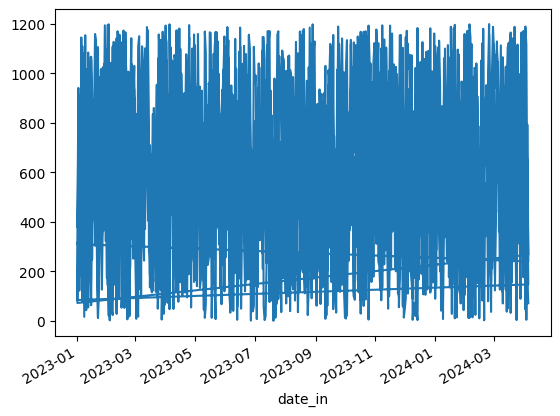

In [31]:
df['customer_count'].plot()

<Axes: xlabel='date_in'>

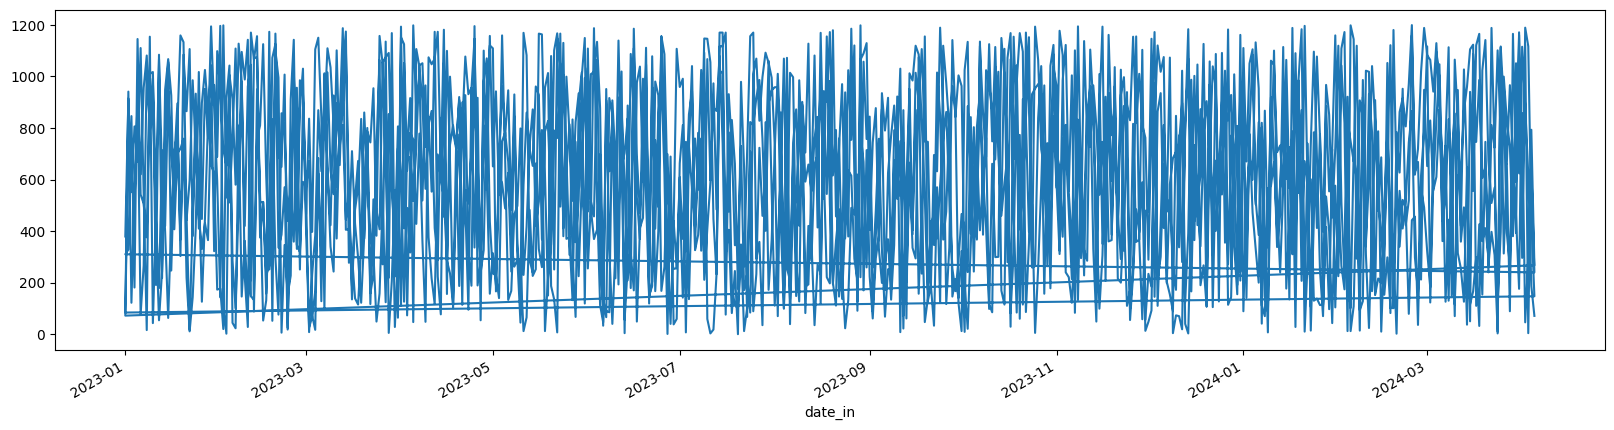

In [33]:
df['customer_count'].plot(figsize=(20,5))

In [35]:
daily_data = df.reset_index().groupby(['country_code','date_in']).sum()
daily_data.index # multiindex

MultiIndex([('IT', '2023-01-01'),
            ('IT', '2023-01-03'),
            ('IT', '2023-01-04'),
            ('IT', '2023-01-05'),
            ('IT', '2023-01-06'),
            ('IT', '2023-01-07'),
            ('IT', '2023-01-08'),
            ('IT', '2023-01-09'),
            ('IT', '2023-01-10'),
            ('IT', '2023-01-12'),
            ...
            ('US', '2024-03-17'),
            ('US', '2024-03-18'),
            ('US', '2024-03-19'),
            ('US', '2024-03-21'),
            ('US', '2024-03-23'),
            ('US', '2024-03-28'),
            ('US', '2024-03-30'),
            ('US', '2024-04-02'),
            ('US', '2024-04-04'),
            ('US', '2024-04-05')],
           names=['country_code', 'date_in'], length=1233)

In [36]:
daily_data

customer_count  status
country_code date_in                           
IT           2023-01-01              72       2
             2023-01-03             596       2
             2023-01-04             743       5
             2023-01-05            1145       2
             2023-01-06             620       1
...                                 ...     ...
US           2024-03-28             264       2
             2024-03-30             590       2
             2024-04-02            2007       6
             2024-04-04             839       4
             2024-04-05             240       3

[1233 rows x 2 columns]

In [37]:
daily_data.index.dtypes

country_code            object
date_in         datetime64[ns]
dtype: object

In [38]:
daily_data.index.unique(level = 'country_code')

Index(['IT', 'KZ', 'RU', 'US'], dtype='object', name='country_code')

In [39]:
daily_data.index.levels[0]

Index(['IT', 'KZ', 'RU', 'US'], dtype='object', name='country_code')

In [41]:
del daily_data['status']

<Axes: xlabel='country_code'>

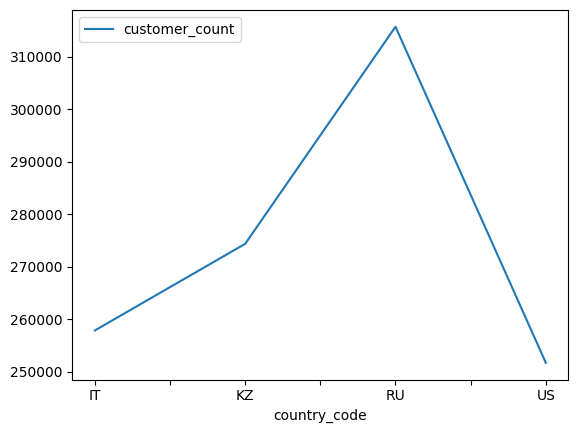

In [42]:
daily_data.groupby(['country_code']).sum('customer_count').plot()

In [43]:
daily_data.groupby(['country_code']).sum('customer_count').drop('index',axis=1)plot()

SyntaxError: invalid syntax (2830797002.py, line 1)

<Axes: xlabel='date_in'>

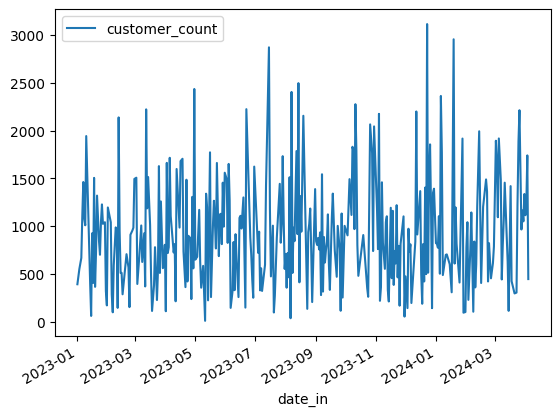

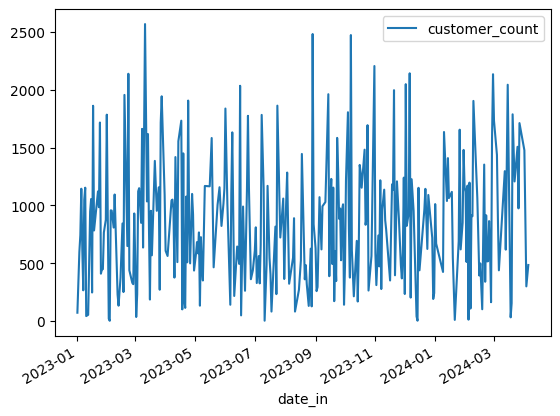

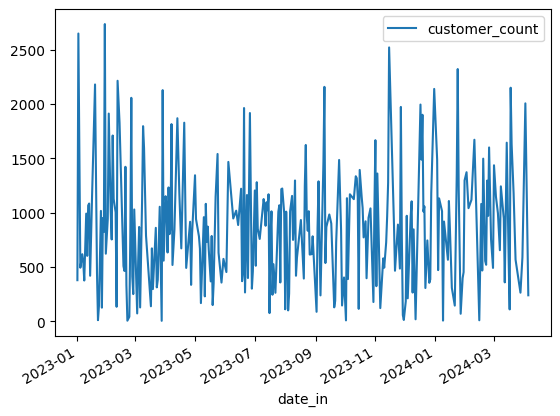

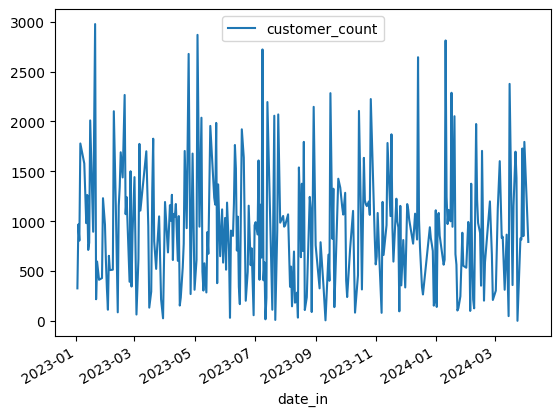

In [44]:
daily_data.loc['RU'].plot()
daily_data.loc['IT'].plot()
daily_data.loc['US'].plot()
daily_data.loc['KZ'].plot()

<Axes: xlabel='date_in'>

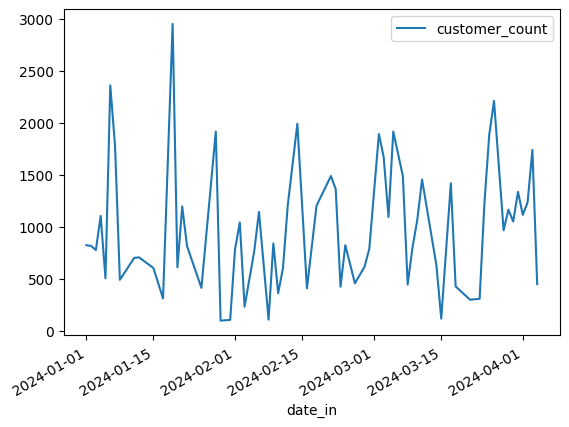

In [46]:
daily_data.loc['RU'].loc['2024'].plot()

<Axes: xlabel='date_in'>

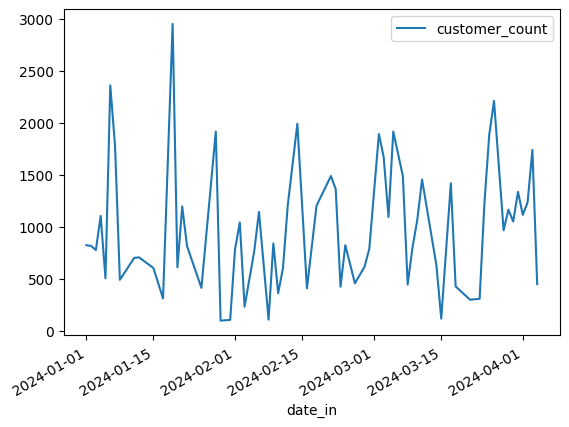

In [48]:
daily_data.loc['RU']['2024':].plot()

<Axes: xlabel='date_in'>

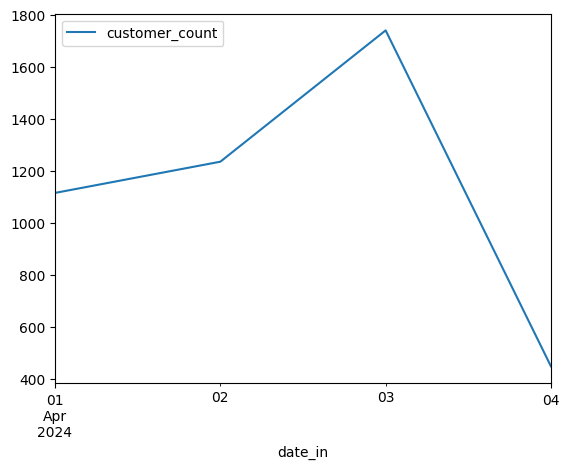

In [49]:
daily_data.loc['RU']['2024-04':].plot()

In [52]:
# anomalii
# lower = x.quantile
grouped_year_month_df = daily_data.groupby([daily_data.index.get_level_values(0), daily_data.index.get_level_values(1).year, daily_data.index.get_level_values(1).month]) # group by country, 
grouped_year_month_df.head(10)

customer_count
country_code date_in                   
IT           2023-01-01              72
             2023-01-03             596
             2023-01-04             743
             2023-01-05            1145
             2023-01-06             620
...                                 ...
US           2024-03-13            1027
             2024-03-14            1645
             2024-04-02            2007
             2024-04-04             839
             2024-04-05             240

[611 rows x 1 columns]

In [53]:
grouped_year_month_df = daily_data.groupby([daily_data.index.get_level_values(0), daily_data.index.get_level_values(1).year, daily_data.index.get_level_values(1).month])
daily_data['lower'] = grouped_year_month_df['customer_count'].transform(lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)))
daily_data['upper'] = grouped_year_month_df['customer_count'].transform(lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)))
daily_data['outlier'] = (daily_data['customer_count'] < daily_data['lower']) | (daily_data['customer_count'] > daily_data['upper'])


In [54]:
daily_data.head(20)

customer_count   lower   upper  outlier
country_code date_in                                            
IT           2023-01-01              72 -733.25  2243.5    False
             2023-01-03             596 -733.25  2243.5    False
             2023-01-04             743 -733.25  2243.5    False
             2023-01-05            1145 -733.25  2243.5    False
             2023-01-06             620 -733.25  2243.5    False
             2023-01-07             266 -733.25  2243.5    False
             2023-01-08            1051 -733.25  2243.5    False
             2023-01-09            1154 -733.25  2243.5    False
             2023-01-10              43 -733.25  2243.5    False
             2023-01-12              54 -733.25  2243.5    False
             2023-01-14             948 -733.25  2243.5    False
             2023-01-15            1056 -733.25  2243.5    False
             2023-01-16             247 -733.25  2243.5    False
             2023-01-17            1863 -733.25  2243.5    False
             2023-01-18             784 -733.25  2243.5    False
             2023-01-22            1122 -733.25  2243.5    False
             2023-01-23             985 -733.25  2243.5    False
             2023-01-24            1718 -733.25  2243.5    False
             2023-01-25             410 -733.25  2243.5    False
             2023-01-26             447 -733.25  2243.5    False

In [56]:
daily_data[daily_data['outlier']==True].head(20)

customer_count     lower     upper  outlier
country_code date_in                                                
IT           2023-02-22            2140  -888.625  2106.375     True
             2023-07-24            1864  -606.125  1839.125     True
             2023-08-29            2484  -674.000  1871.750     True
KZ           2023-01-20            2975  -679.500  2522.000     True
             2023-04-25            2676  -547.000  2335.000     True
             2023-05-04            2867  -786.375  2614.375     True
             2023-07-09            2721  -791.125  2386.625     True
             2023-12-14            2643  -663.375  2111.875     True
             2024-01-11            2811  -524.875  2193.125     True
             2024-01-17            2287  -524.875  2193.125     True
RU           2023-02-12            2137  -567.625  2008.875     True
             2023-03-12            2221  -577.500  2140.250     True
             2023-07-15            2869  -494.000  2116.000     True
             2023-12-23            3112 -1073.375  2939.875     True
             2024-01-06            2361  -690.625  2318.875     True
             2024-01-19            2953  -690.625  2318.875     True
US           2023-01-02            2650  -730.250  2210.500     True
             2023-01-29            2737  -730.250  2210.500     True
             2023-11-15            2522  -728.750  2325.250     True

In [59]:
daily_data[daily_data['outlier']==True].head(10)

customer_count    lower     upper  outlier
country_code date_in                                               
IT           2023-02-22            2140 -888.625  2106.375     True
             2023-07-24            1864 -606.125  1839.125     True
             2023-08-29            2484 -674.000  1871.750     True
KZ           2023-01-20            2975 -679.500  2522.000     True
             2023-04-25            2676 -547.000  2335.000     True
             2023-05-04            2867 -786.375  2614.375     True
             2023-07-09            2721 -791.125  2386.625     True
             2023-12-14            2643 -663.375  2111.875     True
             2024-01-11            2811 -524.875  2193.125     True
             2024-01-17            2287 -524.875  2193.125     True

In [60]:
# max po godam
df.shape

(1844, 3)

In [62]:
all_df = pd.DataFrame(daily_data['customer_count'].groupby(daily_data.index.get_level_values(1)).sum())
all_df.columns = ['customer_count']


In [63]:
all_df.head(10)

,customer_count
date_in,
2023-01-01,845
2023-01-02,2978
2023-01-03,2117
2023-01-04,2043
2023-01-05,3593
2023-01-06,2348
2023-01-07,2271
2023-01-08,2508
2023-01-09,3743


In [65]:
all_df.groupby?

Signature:
all_df.groupby(
    by=None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    level: 'IndexLabel | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    observed: 'bool | lib.NoDefault' = <no_default>,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, pd.Grouper or list of such
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarray of le

In [66]:
year_groupped_df = all_df.groupby([lambda x: x.year])
all_df['max'] = year_groupped_df['customer_count'].transform(lambda x: x.max())
all_df.head()

,customer_count,max
date_in,,
2023-01-01,845,4387
2023-01-02,2978,4387
2023-01-03,2117,4387
2023-01-04,2043,4387
2023-01-05,3593,4387


In [69]:
# godovaja cel
data = [1000, 2000, 3000]
idx = pd.date_range(start='2022-01-01', end='2025-01-01', freq='A')
BAG = pd.DataFrame(data, index=idx, columns=['BAG'])
BAG.head()

/tmp/ipykernel_334161/472649903.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  idx = pd.date_range(start='2022-01-01', end='2025-01-01', freq='A')


,BAG
2022-12-31,1000
2023-12-31,2000
2024-12-31,3000


In [73]:
combined = pd.concat([all_df, BAG], axis=0)
combined.sort_index(axis=0)
combined.tail()

,customer_count,max,BAG
2024-04-04,2080.0,3793.0,NaN
2024-04-05,725.0,3793.0,NaN
2022-12-31,NaN,NaN,1000.0
2023-12-31,NaN,NaN,2000.0
2024-12-31,NaN,NaN,3000.0


In [76]:
## na odnom ghrafike otdelno BAG i max
!pip --help



Usage:   
  pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                    

/tmp/ipykernel_334161/433297737.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined['BAG'].fillna(method='pad').plot(color='green',label='BAG')
/tmp/ipykernel_334161/433297737.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined['max'].fillna(method='pad').plot(color='blue',label='All markets')


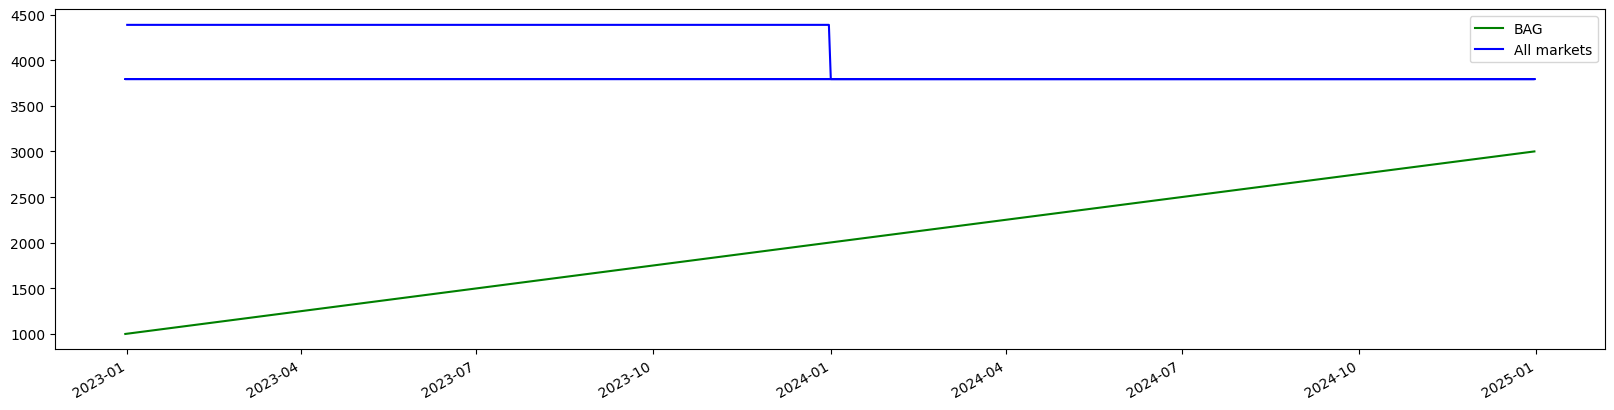

In [79]:
## 08.04
fig, axes = plt.subplots(figsize=(20,5))
combined['BAG'].fillna(method='pad').plot(color='green',label='BAG')
combined['max'].fillna(method='pad').plot(color='blue',label='All markets')
plt.legend(loc = 'best')

In [88]:
year = combined.groupby(lambda x: x.year).max()
year

,customer_count,max,BAG
2022,NaN,NaN,1000.0
2023,4387.0,4387.0,2000.0
2024,3793.0,3793.0,3000.0


In [85]:
year['max'] = [1500, 3965,4235]
year


NameError: name 'year' is not defined

In [83]:
year['yr_pct_change'] = year['MAX'].pct_change(periods=1)


NameError: name 'year' is not defined

In [89]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.5 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 14.3 MB/s eta 0:00:00
